In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import operator

In [88]:
df = pd.read_csv("na_project/data/disease_edgelist.csv")
df_att = pd.read_csv("na_project/data/disease_attributes.csv",index_col="Id")
df = df.iloc[:1550]
df_att[df_att.duplicated(keep=False)]

,Label,Class,Subclass
Id,,,
795,Neurofibromatosis,disease,Cancer
833,Neurofibromatosis,disease,Cancer


In [89]:
#remove edges for diseases with out deg = 1
value_counts = df['Source'].value_counts()
to_remove = value_counts[value_counts <= 1].index
df['Source'].replace(to_remove, 0.0, inplace=True)
df = df[df.Source != 0]

In [90]:
# create matrix where row = dis and col = gene
df = pd.crosstab(df.Source, df.Target)

In [91]:
M = nx.MultiGraph()
G = nx.Graph()

# for each row (disease) make a list of the genes that link to the disease.
for i in df.index[:]:
    row = df.loc[i]
    ind = 0
    genes = []
    for j in row:
        if j != 0:
            genes.append(df.columns[ind])
            ind = ind + 1
        else:
            ind = ind + 1
            
# make edges between the genes for the disease with weight as 1/(number of genes in list - 1)
    for i in genes[:]:
        for j in genes[1:]:
            if i != j:
                w = 1/(len(genes)-1)
                M.add_edge(i,j, weight = w)

# create new graph that does not contain multiple of the same edges
# sum weights for the edges that occure more than once
for i,j,data in M.edges(data=True):
    w = data['weight'] if 'weight' in data else 0.0
    if G.has_edge(i,j):
        G[i][j]['weight'] = G[i][j]['weight'] + w
    else:
        G.add_edge(i, j, weight = w)

# set the node attributes
nx.set_node_attributes(G,df_att.to_dict(orient="index"))
#print(G.edges(data=True))


<Figure size 432x288 with 0 Axes>

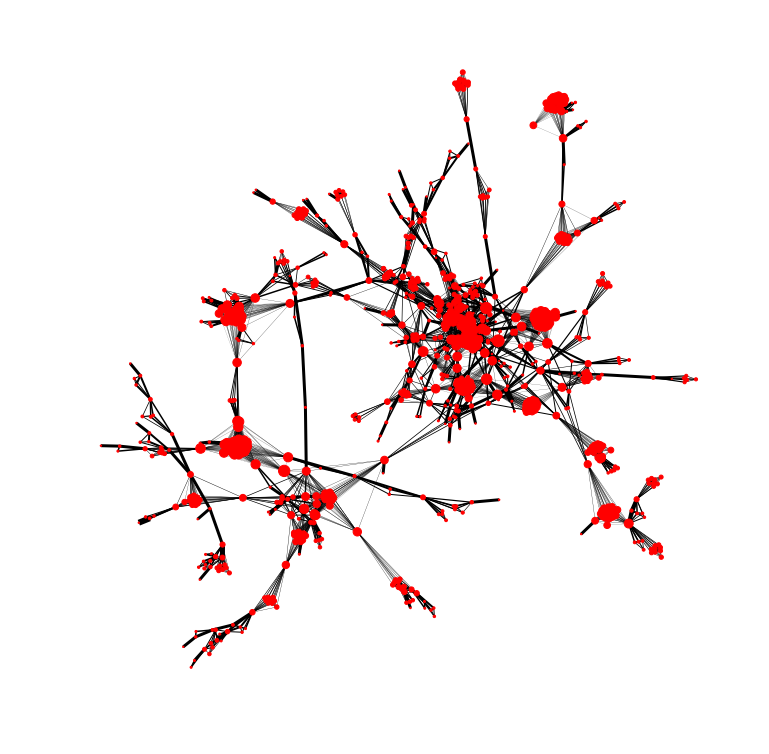

In [131]:
plt.clf()

degr = nx.degree(G)
weights = nx.get_edge_attributes(G,'weight')
label = nx.get_node_attributes(G,'Label')

plt.figure(figsize=(10,10))
nx.draw(G,
        node_size=[degr(n)*2 for n in G.nodes()],
        width=[weights[n]*3 for n in G.edges()])
plt.show()

In [128]:
# list of edges sorted by weight
w = nx.get_edge_attributes(G,'weight')
w = sorted(w.items(), key=operator.itemgetter(1), reverse=True)
w

[((3957, 3397), 2.111111111111111),
 ((3519, 3520), 2.0700280112044815),
 ((3250, 3781), 2.0606060606060606),
 ((3895, 3285), 2.0),
 ((3523, 3318), 2.0),
 ((3511, 3513), 2.0),
 ((2932, 1552), 1.6666666666666665),
 ((3681, 3682), 1.6666666666666665),
 ((3162, 3054), 1.6666666666666665),
 ((3236, 3237), 1.65),
 ((2105, 3730), 1.5),
 ((3324, 3325), 1.5),
 ((3408, 3409), 1.4),
 ((2651, 2652), 1.4),
 ((2816, 2813), 1.3333333333333333),
 ((3143, 3792), 1.3333333333333333),
 ((3577, 3578), 1.2857142857142856),
 ((2309, 3780), 1.2828282828282829),
 ((3915, 3918), 1.25),
 ((3730, 3731), 1.25),
 ((3627, 3626), 1.1666666666666665),
 ((3627, 3974), 1.1666666666666665),
 ((3626, 3974), 1.1666666666666665),
 ((3915, 3467), 1.0689655172413794),
 ((3781, 3782), 1.0606060606060606),
 ((3553, 2525), 1.0),
 ((3567, 3568), 1.0),
 ((3542, 2541), 1.0),
 ((3554, 3191), 1.0),
 ((3678, 3679), 1.0),
 ((3983, 3372), 1.0),
 ((3180, 2649), 1.0),
 ((1776, 3704), 1.0),
 ((3704, 2968), 1.0),
 ((2851, 1339), 1.0),
 ((

In [126]:
# list of nodes sorted by degree
sorted(nx.degree(G),key=operator.itemgetter(1), reverse=True)

[(3823, 70),
 (3957, 70),
 (3677, 65),
 (2000, 64),
 (3180, 55),
 (2840, 54),
 (3251, 51),
 (3985, 48),
 (3250, 48),
 (2127, 47),
 (3495, 46),
 (3220, 45),
 (3852, 45),
 (3795, 44),
 (3798, 44),
 (3799, 44),
 (3800, 44),
 (3514, 44),
 (2309, 42),
 (3335, 42),
 (3780, 42),
 (2214, 42),
 (3712, 42),
 (3844, 42),
 (3160, 41),
 (3821, 41),
 (3974, 40),
 (3580, 40),
 (3249, 40),
 (1990, 40),
 (1992, 40),
 (1994, 40),
 (1996, 40),
 (1998, 40),
 (2004, 40),
 (2005, 40),
 (2008, 40),
 (2009, 40),
 (2010, 40),
 (2011, 40),
 (2012, 40),
 (2015, 40),
 (2016, 40),
 (2017, 40),
 (2018, 40),
 (2019, 40),
 (2021, 40),
 (2023, 40),
 (2024, 40),
 (2025, 40),
 (2026, 40),
 (2027, 40),
 (2028, 40),
 (2029, 40),
 (2030, 40),
 (2049, 40),
 (2904, 40),
 (2985, 40),
 (3306, 40),
 (3555, 40),
 (2842, 39),
 (3446, 39),
 (2799, 38),
 (3332, 38),
 (3839, 38),
 (2441, 38),
 (3023, 38),
 (3025, 38),
 (3027, 38),
 (2555, 37),
 (2761, 37),
 (3720, 37),
 (2809, 37),
 (3702, 36),
 (3472, 36),
 (3915, 36),
 (3796, 36),